In [1]:
sc

<SparkContext master=spark://192.168.20.1:7077 appName=PySparkShell>

In [2]:
! ls -l /root/notebook/chestimage/chest_xray/train

total 276
drwxr-xr-x 2 root root  69632 Mar 22  2018 NORMAL
drwxr-xr-x 2 root root 204800 Mar 22  2018 PNEUMONIA


In [3]:
! ls -l /root/notebook/chestimage/chest_xray

total 12
drwxr-xr-x 2 root root 4096 Apr 29 15:03 test
drwxr-xr-x 4 root root 4096 Mar 22  2018 train
drwxr-xr-x 4 root root 4096 Mar 22  2018 val


In [4]:
! ls /root/notebook/chestimage/chest_xray/train/NORMAL/*.jpeg | wc -l

1341


In [5]:
! ls /root/notebook/chestimage/chest_xray/train/PNEUMONIA/*.jpeg | wc -l

3875


In [6]:
#! ls /home/aekanun/flower_photos/tulips/*.jpg

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: Fu

In [8]:
#Cheking datasets
import os
paths = os.listdir(path="/root/notebook/chestimage/chest_xray")
print(paths)

['train', 'val', '.DS_Store', 'test']


In [9]:
path_train = "/root/notebook/chestimage/chest_xray/train"
path_val = "/root/notebook/chestimage/chest_xray/val"
path_test = "/root/notebook/chestimage/chest_xray/test"

In [10]:
img = glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

In [11]:
img

['/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person900_virus_1554.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1942_bacteria_4865.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1197_bacteria_3147.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1314_virus_2268.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person382_bacteria_1740.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1343_virus_2316.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person552_bacteria_2315.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1495_virus_2603.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person884_bacteria_2808.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person449_bacteria_1939.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1473_bacteria_3836.jpeg',
 '/root/notebook/chestimage/chest_xray/train/PNEUMONIA/perso

In [12]:
img = np.asarray(plt.imread(img[0]))

In [13]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [14]:
plt.imshow(img)

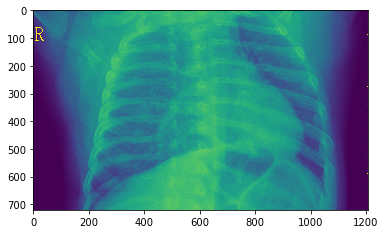

In [15]:
plt.show()

In [16]:
img.shape

(720, 1208)

In [17]:
img = glob(path_train+"/NORMAL/*.jpeg") #Getting all images in this folder

In [18]:
img = np.asarray(plt.imread(img[0]))

In [19]:
plt.imshow(img)

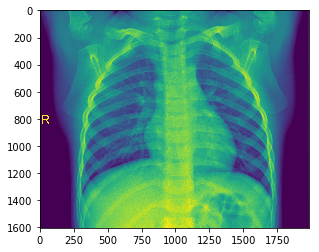

In [20]:
plt.show()

In [21]:
img.shape

(1603, 1982)

In [22]:
from pyspark.serializers import PickleSerializer

In [23]:
spark = SparkSession.builder.master("yarn").appName("AppName").\
config("spark.serializer","PickleSerializer").\
config("spark.driver.maxResultSize", "7g").\
getOrCreate()

In [24]:
normal_files = !ls /root/notebook/chestimage/chest_xray/train/NORMAL/*.jpeg

In [25]:
pneumonia_files = !ls /root/notebook/chestimage/chest_xray/train/PNEUMONIA/*.jpeg

In [26]:
normal_files

['/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0115-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0117-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0119-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0122-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0125-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0127-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0128-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0129-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0131-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0133-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0135-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0137-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0140-0001.jpeg',
 '/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0141-0001

In [27]:
from pyspark.sql.functions import lit
from sparkdl.image import imageIO
import pyspark.ml.linalg as spla
import pyspark.sql.types as sptyp
import numpy as np

def CreateTrainImageUriandLabels(image_uris, label, cardinality):
  # Create image categorical labels (integer IDs)
  local_rows = []
  for uri in image_uris:
    label_inds = np.zeros(cardinality)
    label_inds[label] = 1.0
    one_hot_vec = spla.Vectors.dense(label_inds.tolist())
    _row_struct = {"uri": uri, "one_hot_label": one_hot_vec, "label": float(label)}
    row = sptyp.Row(**_row_struct)
    local_rows.append(row)

  image_uri_df = sqlContext.createDataFrame(local_rows)
  return image_uri_df

In [28]:
label_cardinality = 2

In [29]:
normal_uri_df = CreateTrainImageUriandLabels(normal_files,0,label_cardinality)

In [30]:
normal_uri_df.count()

1341

In [31]:
pneumonia_uri_df = CreateTrainImageUriandLabels(pneumonia_files,1,label_cardinality)

In [32]:
pneumonia_uri_df.count()

3875

In [33]:
normal_uri_df.count()

1341

In [34]:
normal_train, normal_test, normal_dummy = normal_uri_df.randomSplit([0.3, 0.2, 0.5])

In [35]:
pneumonia_train, pneumonia_test, pneumonia_dummy = pneumonia_uri_df.randomSplit([0.1, 0.3, 0.6])

In [36]:
normal_train

DataFrame[label: double, one_hot_label: vector, uri: string]

In [37]:
normal_train.count()

402

In [38]:
normal_train.take(1)

[Row(label=0.0, one_hot_label=DenseVector([1.0, 0.0]), uri='/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0127-0001.jpeg')]

In [39]:
pneumonia_train.take(1)

[Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')]

In [40]:
pneumonia_test.take(1)

[Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1009_virus_1694.jpeg')]

In [41]:
pneumonia_train.count()

395

In [42]:
pneumonia_train.take(10)

[Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1016_bacteria_2947.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1016_virus_1704.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1042_virus_1737.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1046_virus_1742.j

In [43]:
train_df = normal_train.unionAll(pneumonia_train)
test_df = normal_test.unionAll(pneumonia_test)

In [44]:
train_df.count()

797

In [45]:
test_df.count()

1465

In [46]:
train_df = train_df.repartition(80000)
test_df = test_df.repartition(80000)

In [47]:
! rm -rf /tmp/*.h5

In [48]:
#Import Keras Model and Customize it with Keras Layers
from keras.layers import *
from keras.models import Sequential

model = Sequential()

In [49]:
#conv-1
model.add(ZeroPadding2D((1,1),input_shape=(226, 226, 3)))
model.add(Conv2D(96, (24,24), strides=(2, 2),activation='relu'))  

#conv-2
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(16, (1,1),activation='relu'))  
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256,(16,16),activation='relu'))

#max pool-1
model.add(MaxPooling2D((2,2),strides=(2,2))) 

In [50]:
#conv-3
#model.add(ZeroPadding2D((1,1)))
#model.add(Conv2D(16, (1,1),activation='relu'))  
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(384, (3,3),activation='relu'))  

#conv-4
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(16, (1,1),activation='relu'))  
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256,(5,5),activation='relu')) 

In [51]:
#conv-5
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(96, (7,7),activation='relu'))  

#max pool-2
model.add(ZeroPadding2D((1,1)))
model.add(MaxPooling2D((3,3),strides=(1,1))) 


In [52]:
model.add(Flatten(input_shape=(11, 11, 96)))
model.add(Dense(2))
model.add(Activation("softmax"))
model.save('/tmp/model-small.h5')  # saves to the local filesystem

In [53]:
! ls -lh /tmp/model-small.h5

-rw-r--r-- 1 root root 15M Aug  7 14:41 /tmp/model-small.h5


In [54]:
import PIL.Image
import numpy as np
from keras.applications.imagenet_utils import preprocess_input

def load_image_from_uri(local_uri):
  img = (PIL.Image.open(local_uri).convert('RGB').resize((226, 226), PIL.Image.ANTIALIAS))
  img_arr = np.array(img).astype(np.float32)
  img_tnsr = preprocess_input(img_arr[np.newaxis, :])
  return img_tnsr

In [55]:
train_df

DataFrame[label: double, one_hot_label: vector, uri: string]

In [56]:
train_df.select('one_hot_label').take(5)

[Row(one_hot_label=DenseVector([0.0, 1.0])),
 Row(one_hot_label=DenseVector([0.0, 1.0])),
 Row(one_hot_label=DenseVector([0.0, 1.0])),
 Row(one_hot_label=DenseVector([0.0, 1.0])),
 Row(one_hot_label=DenseVector([0.0, 1.0]))]

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 103, 103, 96)      165984    
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 105, 105, 96)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 16)      1552      
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 107, 107, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 256)       1048832   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 256)       0         
__________

In [58]:
#load_image_from_uri('/home/aekanun/input/chest_xray/train/PNEUMONIA/person30_bacteria_152.jpeg')

In [59]:
! ls -l /tmp/model-small.h5

-rw-r--r-- 1 root root 15059952 Aug  7 14:41 /tmp/model-small.h5


In [60]:
from sparkdl.estimators.keras_image_file_estimator import KerasImageFileEstimator

#dbutils.fs.cp(dbfs_model_small_path, 'file:/tmp/model-small-tmp.h5')
estimator = KerasImageFileEstimator(inputCol="uri",
                                    outputCol="prediction",
                                    labelCol="one_hot_label",
                                    imageLoader=load_image_from_uri,
                                    kerasOptimizer='adam',
                                    kerasLoss='categorical_crossentropy',
                                    kerasFitParams={'verbose':2,'epochs':25},
                                    modelFile='/tmp/model-small.h5')

In [61]:
train_df.take(3)

[Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1597_bacteria_4187.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person23_bacteria_80.jpeg'),
 Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')]

In [62]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [63]:
sc.serializer

AutoBatchedSerializer(PickleSerializer())

In [64]:
sc.serializer.bestSize

65536

In [65]:
import time as t

In [66]:
start_train_timer = t.time()

In [67]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder



cvModel = estimator.fit(train_df)

In [68]:
t.time() - start_train_timer

15623.538214921951

In [69]:
cvModel

KerasImageFileTransformer_839684187960

In [70]:
train_df.count()

797

In [71]:
cvModel.set

<bound method Params.set of KerasImageFileTransformer_839684187960>

In [72]:
test_df.count()

1465

In [73]:
start_test_timer = t.time()

In [74]:
mc = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label" )

In [75]:
eval_result = mc.evaluate(cvModel.transform(test_df))

INFO:tensorflow:Froze 16 variables.


/root/.local/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Converted 16 variables to const ops.
INFO:tensorflow:Froze 0 variables.
Converted 0 variables to const ops.


In [76]:
t.time() - start_test_timer

2065.9351029396057

In [77]:
eval_result

0.6373352890256808

In [78]:
cvModel

KerasImageFileTransformer_839684187960

In [79]:
performance_df = cvModel.transform(test_df)

INFO:tensorflow:Froze 16 variables.


/root/.local/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Converted 16 variables to const ops.
INFO:tensorflow:Froze 0 variables.
Converted 0 variables to const ops.


In [80]:
performance_df

DataFrame[label: double, one_hot_label: vector, uri: string, prediction: vector]

In [81]:
from pyspark.sql.functions import col

In [82]:
performance_df.select(['uri','label','one_hot_label','prediction']).filter(col('uri').like('%NORMAL%')).take(100)

[Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1322-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5482, 0.4518])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1141-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5194, 0.4806])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1187-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.4481, 0.5519])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1148-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.4772, 0.5228])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1357-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5391, 0.4609])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1105-0001.jpeg', label=0

In [83]:
performance_df.select(['uri','label','one_hot_label','prediction'])\
.filter(col('uri').like('%virus%')).take(10)

[Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person155_virus_307.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5317, 0.4683])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person151_virus_301.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5511, 0.4489])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1548_virus_2689.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5216, 0.4784])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1564_virus_2719.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.562, 0.438])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1551_virus_2692.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.457, 0.543])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person154_virus_305.

In [84]:
img = glob(path_train+"/NORMAL/NORMAL2-IM-1329-0001.jpeg") 

In [85]:
img = np.asarray(plt.imread(img[0]))

In [86]:
plt.imshow(img)

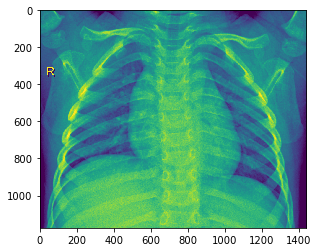

In [87]:
plt.show()

In [88]:
img = glob(path_train+"/NORMAL/NORMAL2-IM-1317-0001.jpeg") 

In [89]:
img = np.asarray(plt.imread(img[0]))

In [90]:
plt.imshow(img)

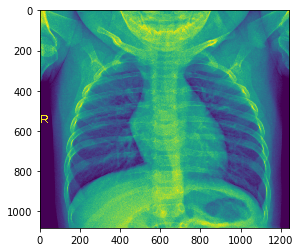

In [91]:
plt.show()

In [92]:
performance_df.select(['uri','label','one_hot_label','prediction']).filter(col('uri').like('%NORMAL%')).take(100)

[Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1322-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5482, 0.4518])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1141-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5194, 0.4806])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1187-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.4481, 0.5519])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1148-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.4772, 0.5228])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1357-0001.jpeg', label=0.0, one_hot_label=DenseVector([1.0, 0.0]), prediction=DenseVector([0.5391, 0.4609])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/NORMAL/NORMAL2-IM-1105-0001.jpeg', label=0

In [93]:
performance_df.select(['uri','label','one_hot_label','prediction']).filter(col('uri').like('%PNEUMONIA%')).take(100)

[Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1537_bacteria_4020.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.4776, 0.5224])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1737_bacteria_4573.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.4579, 0.5421])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person155_virus_307.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5317, 0.4683])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1644_bacteria_4361.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5247, 0.4753])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1658_bacteria_4402.jpeg', label=1.0, one_hot_label=DenseVector([0.0, 1.0]), prediction=DenseVector([0.5168, 0.4832])),
 Row(uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/pe

In [94]:
img = glob(path_train+"/PNEUMONIA/person349_virus_724.jpeg") #Getting all images in this folder

In [95]:
img = np.asarray(plt.imread(img[0]))

In [96]:
plt.imshow(img)

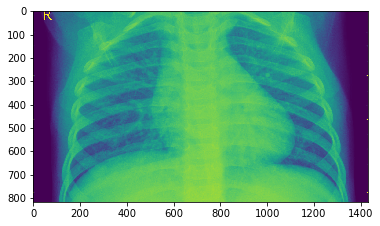

In [97]:
plt.show()

In [98]:
from pyspark.sql.functions import col

In [99]:
from pyspark.mllib.linalg import DenseVector

In [100]:
pneumonia_train.take(1)

[Row(label=1.0, one_hot_label=DenseVector([0.0, 1.0]), uri='/root/notebook/chestimage/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')]

In [101]:
normal_train.take(1)

[Row(label=0.0, one_hot_label=DenseVector([1.0, 0.0]), uri='/root/notebook/chestimage/chest_xray/train/NORMAL/IM-0127-0001.jpeg')]

In [102]:
#sc.stop()

In [103]:
#sc

In [104]:
cvModel

KerasImageFileTransformer_839684187960

In [105]:
cvModel

KerasImageFileTransformer_839684187960

In [106]:
eval_result

0.6373352890256808

In [107]:
cvModel.getImageLoader

<bound method CanLoadImage.getImageLoader of KerasImageFileTransformer_839684187960>

In [108]:
performance_df

DataFrame[label: double, one_hot_label: vector, uri: string, prediction: vector]

In [109]:
from pyspark.sql import functions as F

In [110]:
result_list = performance_df.groupBy('one_hot_label').agg(F.collect_list('prediction')).take(10)

In [111]:
len(result_list)

2

In [112]:
result_list[0][1][0]

DenseVector([0.4772, 0.5228])

In [113]:
#result_list[0][1]

In [114]:
true_neg_count = 0
for predicted_label in result_list[0][1]:
    
    if predicted_label[0]>predicted_label[1]:
        print(predicted_label)
        true_neg_count = true_neg_count+1
print ("TN: ",true_neg_count/len(result_list[0][1]))
print ("ALL normal: " ,len(result_list[0][1]))
        

[0.506457507610321,0.49354246258735657]
[0.5039541721343994,0.4960458278656006]
[0.5341436862945557,0.46585628390312195]
[0.5013272762298584,0.498672753572464]
[0.5506962537765503,0.4493037462234497]
[0.5487483739852905,0.4512515962123871]
[0.553642749786377,0.44635719060897827]
[0.5573542714118958,0.4426456689834595]
[0.5654815435409546,0.434518426656723]
[0.5829725861549377,0.41702741384506226]
[0.525515615940094,0.4744843542575836]
[0.5058584809303284,0.49414145946502686]
[0.5270151495933533,0.47298482060432434]
[0.5268331170082092,0.47316691279411316]
[0.5125972628593445,0.4874027669429779]
[0.5342580080032349,0.46574199199676514]
[0.5186246037483215,0.48137542605400085]
[0.5587409734725952,0.4412590265274048]
[0.5497326254844666,0.45026740431785583]
[0.5319806933403015,0.4680192470550537]
[0.5468626022338867,0.45313742756843567]
[0.545526921749115,0.4544731378555298]
[0.5130924582481384,0.4869075417518616]
[0.5204125642776489,0.4795874357223511]
[0.5291885733604431,0.4708113968372

In [115]:
true_pos_count = 0
for predicted_label in result_list[1][1]:
    
    if predicted_label[0]<predicted_label[1]:
        print(predicted_label)
        true_pos_count = true_pos_count+1
print ("TP: ",true_pos_count/len(result_list[1][1]))
print ("ALL positive: " ,len(result_list[1][1]))

[0.4617237150669098,0.5382762551307678]
[0.46138039231300354,0.5386195778846741]
[0.47763875126838684,0.5223612785339355]
[0.4793427884578705,0.5206572413444519]
[0.45706480741500854,0.5429351925849915]
[0.4426174461841583,0.5573825836181641]
[0.4851817190647125,0.5148182511329651]
[0.49033331871032715,0.5096667408943176]
[0.46741360425949097,0.5325863361358643]
[0.43837088346481323,0.5616291165351868]
[0.442046195268631,0.5579538345336914]
[0.46389836072921753,0.5361016988754272]
[0.4932699203491211,0.5067301392555237]
[0.45548632740974426,0.5445136427879333]
[0.4621969163417816,0.5378031134605408]
[0.4544093906879425,0.5455905795097351]
[0.46064886450767517,0.5393511056900024]
[0.48868080973625183,0.5113191604614258]
[0.4660799205303192,0.5339200496673584]
[0.4868122339248657,0.5131877660751343]
[0.4559248983860016,0.544075071811676]
[0.47326865792274475,0.5267313122749329]
[0.46066850423812866,0.5393314957618713]
[0.4342637062072754,0.5657362341880798]
[0.47758498787879944,0.5224149